# FACIAL EXPRESSIONS DETECTION PROJECT

- The data consists of **48x48** pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The _task_ is to categorize each face based on the emotion shown in the facial expression into one of seven categories:

0) **Angry**

1) **Disgust**

2) **Fear**

3) **Happy**

4) **Neutral**

5) **Sad**

6) **Surprise**


# Libraries

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "hassanalzayer"
os.environ['KAGGLE_KEY'] = "7fd2639f02f6393ffdc26a4ea6186e20"
import random
import shutil

In [4]:
# !kaggle datasets download -d msambare/fer2013
# !kaggle datasets download -d gpreda/haar-cascades-for-face-detection
# !unzip fer2013
# !unzip haar-cascades-for-face-detection

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating: train/sad/Training_65526454.jpg  
  inflating: train/sad/Training_65531175.jpg  
  inflating: train/sad/Training_65552921.jpg  
  inflating: train/sad/Training_65552938.jpg  
  inflating: train/sad/Training_65563105.jpg  
  inflating: train/sad/Training_6558295.jpg  
  inflating: train/sad/Training_65586139.jpg  
  inflating: train/sad/Training_65591252.jpg  
  inflating: train/sad/Training_65626778.jpg  
  inflating: train/sad/Training_65701260.jpg  
  inflating: train/sad/Training_65707197.jpg  
  inflating

In [5]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as kr

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten,AveragePooling2D
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [7]:
from IPython.display import HTML
import matplotlib.animation as animation

# Class Parameters

In [8]:
class RESULTS:
    pass
class PARAMETERS:
    pass
class CLASSINIT:
    pass

# Data Path Process

In [9]:
train_path = "/content/train"
test_path = "/content/test"

In [10]:
name_list = ["ANGRY","DISGUST","FEAR","HAPPY","NEUTRAL","SAD","SURPRISE"]

In [11]:
angry = []
disgust = []
fear = []
happy = []
neutral = []
sad = []
surprise = []

In [12]:
data_list = []

In [13]:
for r,d,f in os.walk(train_path,topdown=False):
    if "angry" in r:
        for x_name in f:
            angry.append(os.path.join(r,x_name))
            data_list.append((os.path.join(r,x_name),0))
    elif "disgust" in r:
        for x_name in f:
            disgust.append(os.path.join(r,x_name))
            data_list.append((os.path.join(r,x_name),1))
    elif "fear" in r:
        for x_name in f:
            fear.append(os.path.join(r,x_name))
            data_list.append((os.path.join(r,x_name),2))
    elif "happy" in r:
        for x_name in f:
            happy.append(os.path.join(r,x_name))
            data_list.append((os.path.join(r,x_name),3))
    elif "neutral" in r:
        for x_name in f:
            neutral.append(os.path.join(r,x_name))
            data_list.append((os.path.join(r,x_name),4))
    elif "sad" in r:
        for x_name in f:
            sad.append(os.path.join(r,x_name))
            data_list.append((os.path.join(r,x_name),5))
    elif "surprise" in r:
        for x_name in f:
            surprise.append(os.path.join(r,x_name))
            data_list.append((os.path.join(r,x_name),6))
    else:
        pass

print("[+] DONE - SUCCESS")

[+] DONE - SUCCESS


In [14]:
full_list = [angry,disgust,fear,happy,neutral,sad,surprise]

In [15]:
for x_n,x_l in zip(name_list,full_list):
    print(f"LEN OF {x_n} FILE: {len(x_l)}")

LEN OF ANGRY FILE: 3995
LEN OF DISGUST FILE: 436
LEN OF FEAR FILE: 4097
LEN OF HAPPY FILE: 7215
LEN OF NEUTRAL FILE: 4965
LEN OF SAD FILE: 4830
LEN OF SURPRISE FILE: 3171


In [16]:
print(f"TOTAL DATA LEN: {len(data_list)}")

TOTAL DATA LEN: 28709


In [17]:
random.shuffle(data_list)

In [18]:
path_all = []
class_all = []
for x_cnt in range(len(data_list)):
    path_all.append(data_list[x_cnt][0])
    class_all.append(data_list[x_cnt][1])

In [19]:
pt_series = pd.Series(path_all,name="PATH")
cl_series = pd.Series(class_all,name="CLASS")

In [20]:
dataframe = pd.concat([pt_series,cl_series],axis=1)

In [21]:
print(f"UNIQUE TARGETS: {np.unique(dataframe.CLASS.values)}")

UNIQUE TARGETS: [0 1 2 3 4 5 6]


# Image and Parameter Control

In [22]:
def single_visual(pt:str,cl:str or int)->RESULTS:
    img = cv.cvtColor(cv.imread(pt),cv.COLOR_BGR2RGB)
    plt.figure(figsize=(15,8))
    plt.xlabel(f"SHAPE: {img.shape}")
    plt.ylabel(f"SIZE: {img.size}")
    plt.title(f"CONTROL CLASS: {cl}")
    plt.imshow(img)
    plt.tight_layout()
    plt.show()

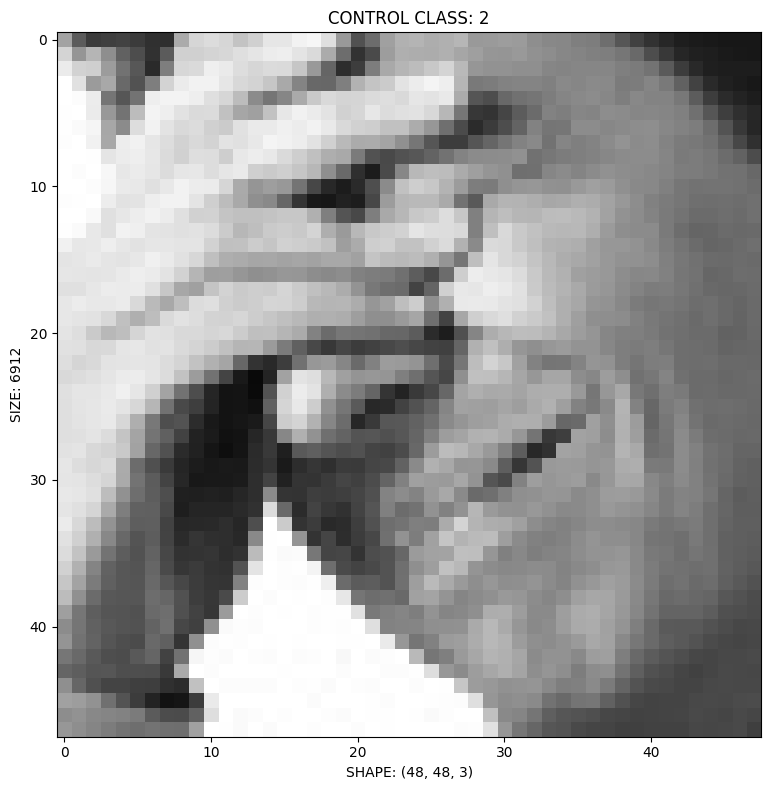

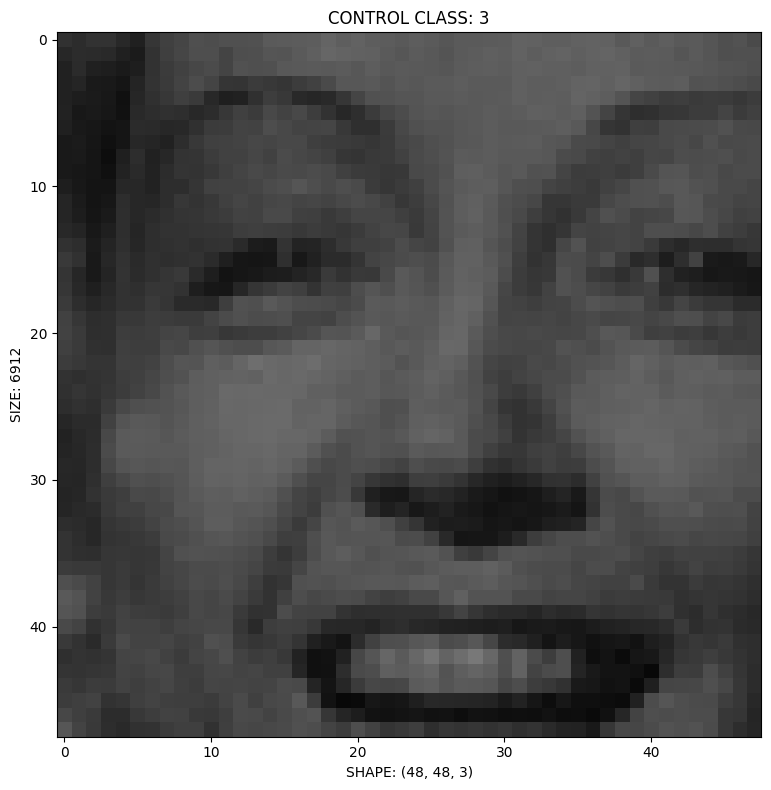

In [23]:
if dataframe.empty:
    print("DataFrame is empty. Add data before accessing values.")
else:
    single_visual(dataframe.PATH[0],dataframe.CLASS[0])
    single_visual(dataframe.PATH[10000],dataframe.CLASS[10000])

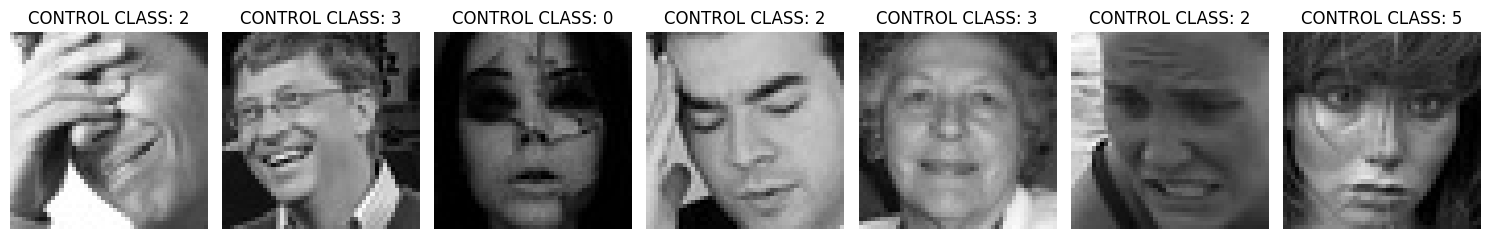

In [24]:
plt.figure(figsize=(15,25))
i_c = 1
for x_path in range(len(dataframe.PATH.values)):
    plt.subplot(1,7,i_c)
    img = cv.cvtColor(cv.imread(dataframe.PATH[x_path*50]),cv.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(f"CONTROL CLASS: {dataframe.CLASS[x_path*50]}")
    plt.imshow(img)
    if i_c == 7:
        break
    i_c += 1
plt.tight_layout()
plt.show()

# Before Training

In [25]:
def convert_process(lm:list,ls:list,dt:classmethod,pr:str,tr:str)->RESULTS:
    for x_path in range(len(dt[pr].values)):
        img = cv.cvtColor(cv.imread(dt[pr][x_path]),cv.COLOR_BGR2GRAY)
        trg = dt[tr][x_path]
        img = img.reshape(img.shape[0],img.shape[1])
        img = img / 255.
        lm.append(img)
        ls.append(trg)

In [26]:
data_image = []
target_image = []
convert_process(data_image,target_image,dataframe,"PATH","CLASS")

In [27]:
print(f"TOTAL LEN OF DATA: {len(data_image)}")
print(f"TOTAL LEN OF TARGET CLASS: {len(target_image)}")

TOTAL LEN OF DATA: 28709
TOTAL LEN OF TARGET CLASS: 28709


In [28]:
data_array = np.array(data_image)
target_array = np.array(target_image)

In [29]:
print(f"DATA SHAPE: {data_array.shape}")
print(f"TARGET SHAPE: {target_array.shape}")

DATA SHAPE: (28709, 48, 48)
TARGET SHAPE: (28709,)


In [30]:
val_data = data_array[data_array.shape[0]-2000:,:,:]
val_target = target_array[target_array.shape[0]-2000:]

In [31]:
data_array = data_array[0:data_array.shape[0]-2000,:,:]
target_array = target_array[0:target_array.shape[0]-2000]

In [32]:
print(f"VALIDATE DATA SHAPE: {val_data.shape}")
print(f"VALIDATE TARGET SHAPE: {val_target.shape}")

VALIDATE DATA SHAPE: (2000, 48, 48)
VALIDATE TARGET SHAPE: (2000,)


In [33]:
print(f"LAST DATA SHAPE: {data_array.shape}")
print(f"LAST TARGET SHAPE: {target_array.shape}")

LAST DATA SHAPE: (26709, 48, 48)
LAST TARGET SHAPE: (26709,)


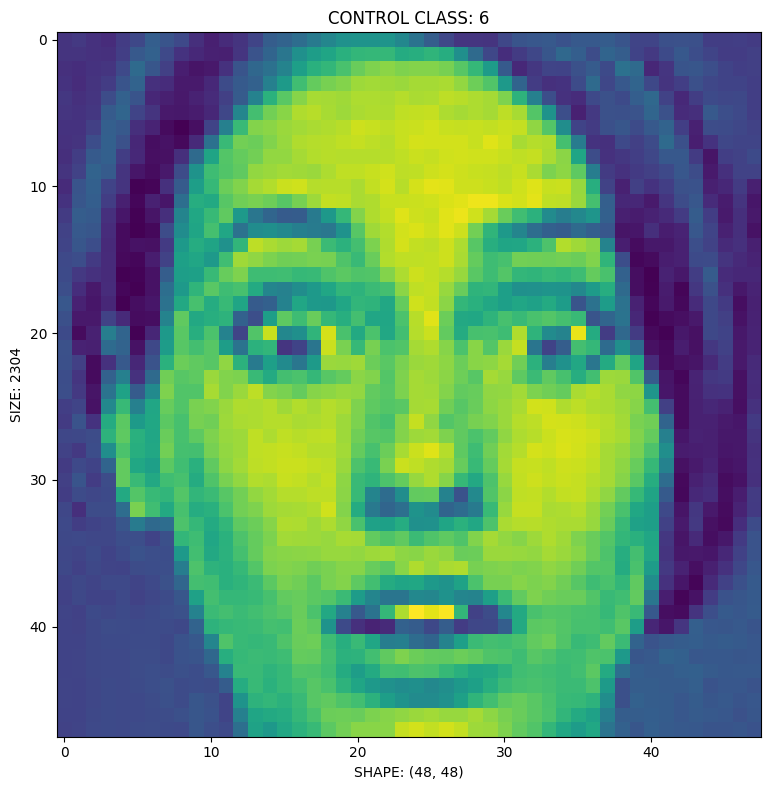

In [34]:
plt.figure(figsize=(15,8))
plt.xlabel(f"SHAPE: {data_array[25000].shape}")
plt.ylabel(f"SIZE: {data_array[25000].size}")
plt.title(f"CONTROL CLASS: {target_array[25000]}")
plt.imshow(data_array[25000])
plt.tight_layout()
plt.show()

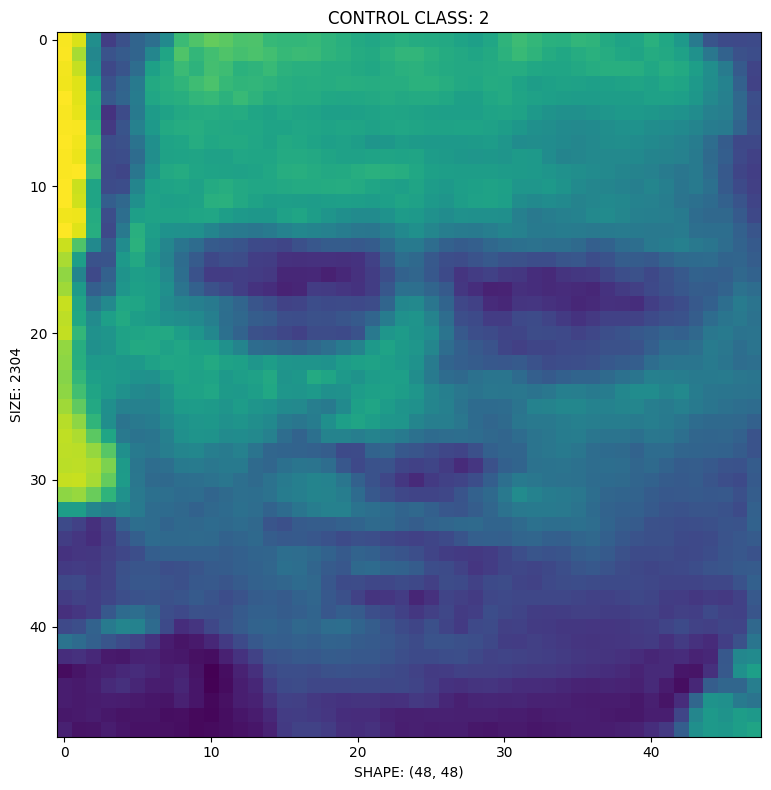

In [35]:
plt.figure(figsize=(15,8))
plt.xlabel(f"SHAPE: {data_array[12000].shape}")
plt.ylabel(f"SIZE: {data_array[12000].size}")
plt.title(f"CONTROL CLASS: {target_array[12000]}")
plt.imshow(data_array[12000])
plt.tight_layout()
plt.show()

In [36]:
mpath = "modelcheckpoint"
if os.path.exists(mpath):
    pass
else:
    os.mkdir(mpath)

In [37]:
#early = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                        #patience=7,
                                        #mode="min",
                                        #restore_best_weights=True)
check = tf.keras.callbacks.ModelCheckpoint(filepath=mpath,
                                          save_best_only=True,
                                          verbose=1,
                                          mode="min",
                                          monitor="val_accuracy")

In [38]:
val_target = np_utils.to_categorical(val_target)
target_array = np_utils.to_categorical(target_array)

In [39]:
print(f"VALIDATE TARGET SHAPE: {val_target.shape}")
print(f"DATA TARGET SHAPE: {target_array.shape}")

VALIDATE TARGET SHAPE: (2000, 7)
DATA TARGET SHAPE: (26709, 7)


# Model - Implementation of LeNet

In [40]:
shape = data_array[0].shape
print(f"SHAPE OF INPUT: {shape}")

SHAPE OF INPUT: (48, 48)


In [41]:
def conv_add(md:classmethod,filters:int,kernelsize:tuple)->PARAMETERS:
    md.add(Conv2D(filters=filters,
                 kernel_size=kernelsize,
                 padding="same",
                 activation="relu"))
    md.add(MaxPooling2D(pool_size=(2,2)))

In [42]:
def fully_connected(md:classmethod,ds:int,act:str)->PARAMETERS:
    md.add(Dense(units=ds,activation=act))

In [43]:
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(5,5),
                 padding="same",
                 activation="relu",
                 input_shape=(48,48,1)))
conv_add(model,64,(2,2))
model.add(BatchNormalization())
conv_add(model,128,(2,2))
model.add(Dropout(0.25))
conv_add(model,256,(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
fully_connected(model,84,"relu")
fully_connected(model,7,"softmax")

In [44]:
print("MODEL SUMMARY:\n\n")
print(model.summary())

MODEL SUMMARY:


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12

In [45]:
model.compile(optimizer=Adam(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [46]:
his = model.fit(data_array,
                target_array,
                epochs=30,
                callbacks=[check],
                validation_data=(val_data,val_target),
                batch_size=120)

Epoch 1/30
223/223 [==============================] - ETA: 0s - loss: 1.7348 - accuracy: 0.3012
Epoch 1: val_accuracy improved from inf to 0.38500, saving model to modelcheckpoint


223/223 [==============================] - 24s 45ms/step - loss: 1.7348 - accuracy: 0.3012 - val_loss: 1.8598 - val_accuracy: 0.3850
Epoch 2/30
223/223 [==============================] - ETA: 0s - loss: 1.4636 - accuracy: 0.4363
Epoch 2: val_accuracy did not improve from 0.38500
223/223 [==============================] - 7s 33ms/step - loss: 1.4636 - accuracy: 0.4363 - val_loss: 1.6325 - val_accuracy: 0.4515
Epoch 3/30
223/223 [==============================] - ETA: 0s - loss: 1.3378 - accuracy: 0.4901
Epoch 3: val_accuracy did not improve from 0.38500
223/223 [==============================] - 7s 33ms/step - loss: 1.3378 - accuracy: 0.4901 - val_loss: 1.4853 - val_accuracy: 0.4710
Epoch 4/30
222/223 [============================>.] - ETA: 0s - loss: 1.2621 - accuracy: 0.5171
Epoch 4: val_accuracy did not improve from 0.38500
223/223 [==============================] - 8s 35ms/step - loss: 1.2622 - accuracy: 0.5170 - val_loss: 1.2289 - val_accuracy: 0.5345
Epoch 5/30
223/223 [==========

In [47]:
plt.style.use("dark_background")

In [48]:
history_data = pd.DataFrame(his.history)

<Figure size 1500x800 with 0 Axes>

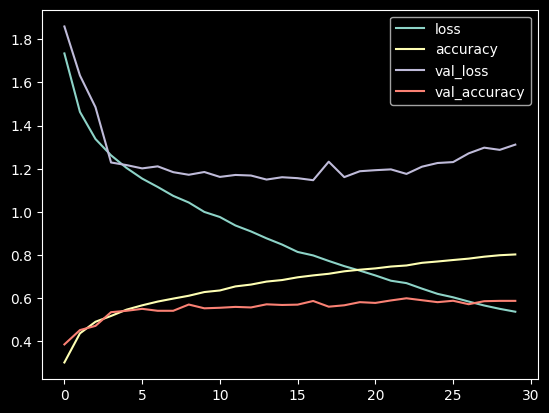

In [49]:
plt.figure(figsize=(15,8))
history_data.plot()
plt.show()

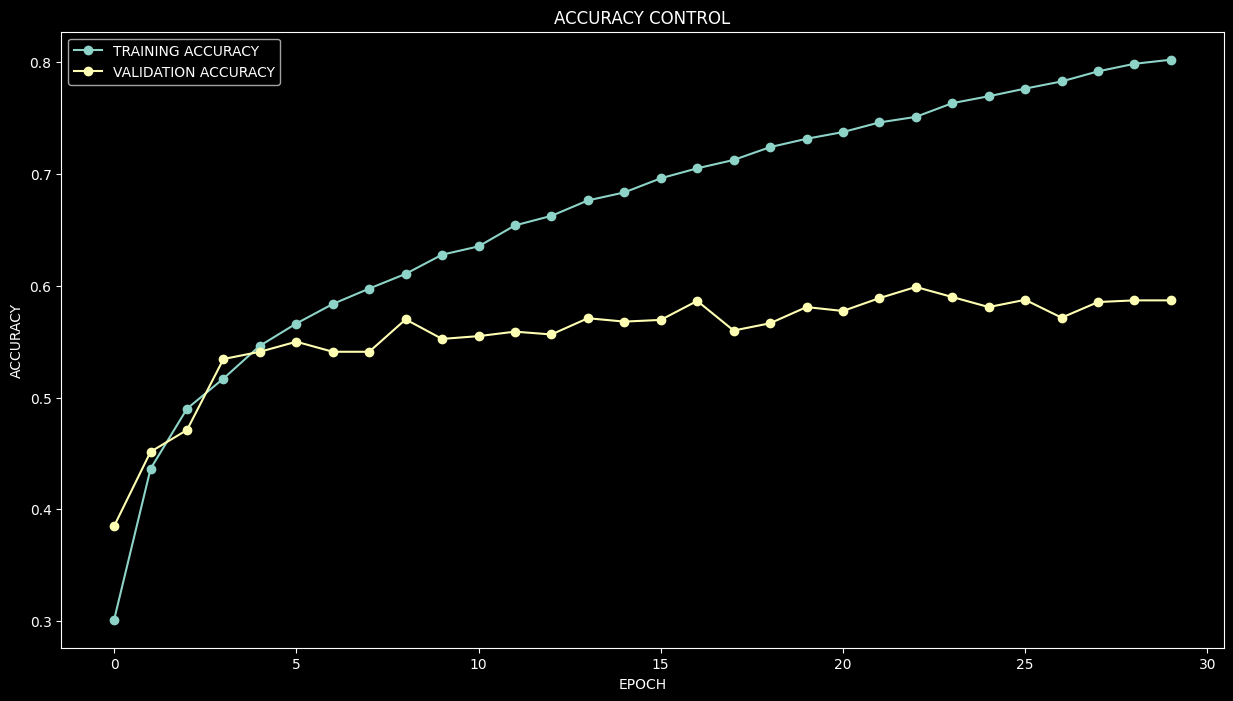

In [50]:
plt.figure(figsize=(15,8))
plt.plot(his.history["accuracy"],label="TRAINING ACCURACY",marker="o")
plt.plot(his.history["val_accuracy"],label="VALIDATION ACCURACY",marker="o")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY")
plt.title("ACCURACY CONTROL")
plt.legend()
plt.show()

In [51]:
model.save("testmodel.h5")

# Face Detection

In [52]:
dict_res = {0:"Angry",
           1:"Disgust",
           2:"Fear",
           3:"Happy",
           4:"Neutral",
           5:"Sad",
           6:"Surprise"}

In [53]:
pathface = "facedata"
if os.path.exists(pathface):
    pass
else:
    os.mkdir(pathface)

In [54]:
mpathface = "mainframedata"
if os.path.exists(mpathface):
    pass
else:
    os.mkdir(mpathface)

In [57]:
def face_ext(datavideo:str,tld:list,pld:list)->RESULTS:
    hd = cv.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
    cap = cv.VideoCapture(datavideo)
    iface = 0
    while (cap.isOpened()):
        r,frm = cap.read()
        if r == True:
            iface += 1
            img = cv.cvtColor(frm,cv.COLOR_BGR2GRAY)
            face = hd.detectMultiScale(img,1.1,4)
            for (x,y,w,h) in face:
                ft = img[y:y+h,x:x+w]
                test_input = cv.resize(ft,(48,48))
                test_input = test_input.reshape(48,48,1)
                test_array = np.array(test_input)
                test_array = np.expand_dims(test_array,axis=0)
                predict_result = model.predict(test_array,verbose=0)
                target_result = list(predict_result[0])
                result_last = target_result.index(max(target_result))
                cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
                cv.putText(img,
                           dict_res[int(result_last)],
                           (x+10,y),
                           cv.FONT_HERSHEY_SIMPLEX,
                           0.9,
                           (0, 0, 255),
                           2)
                tld.append(ft)
                pld.append(img)
                cv.imwrite(f"mainframedata/mainface_{iface}.jpg",img)
                cv.imwrite(f"facedata/face_{iface}.jpg",ft)
    print("[+] DONE")

In [58]:
tld = []
pld = []

In [62]:
face_ext("/content/babies.mp4", tld,pld)

KeyboardInterrupt: ignored

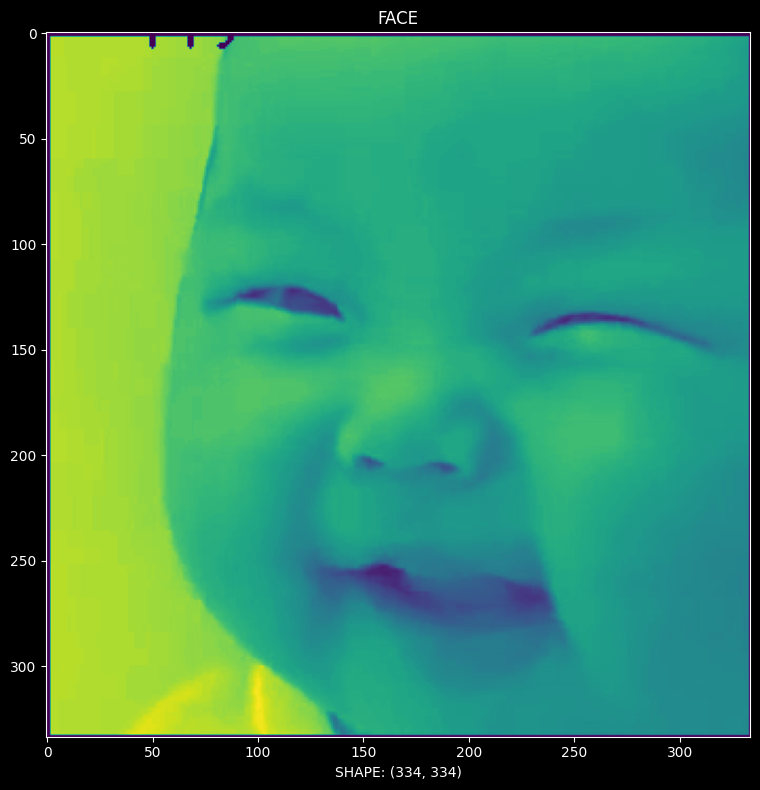

In [63]:
if len(tld) > 0:
    plt.figure(figsize=(15, 8))
    plt.xlabel(f"SHAPE: {tld[0].shape}")
    plt.title("FACE")
    plt.imshow(tld[0])
    plt.tight_layout()
    plt.show()
else:
    print("No elements found in the face_list.")


In [64]:
test_input = cv.resize(tld[0],(48,48))
test_input = test_input.reshape(48,48,1)

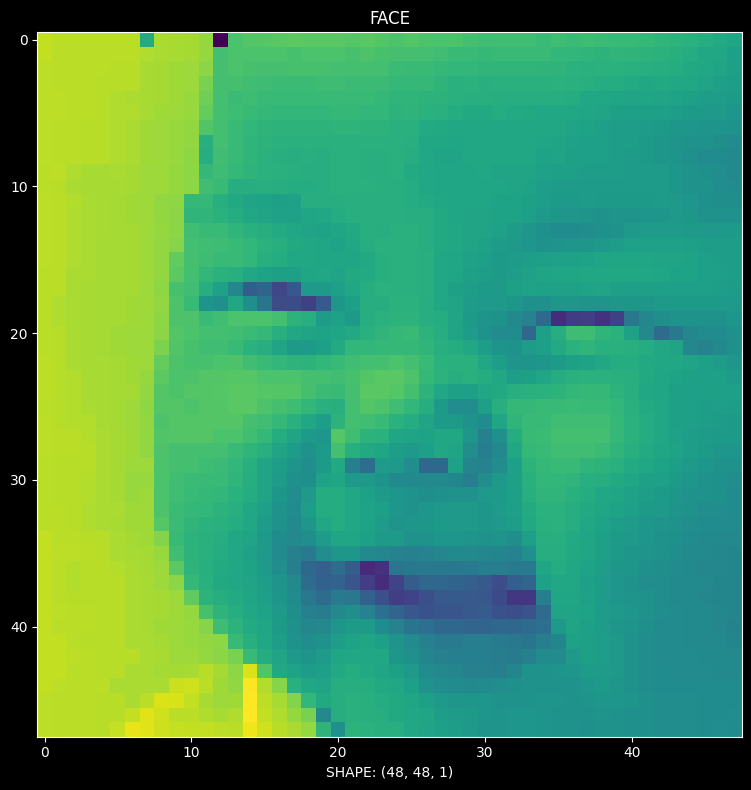

In [66]:
plt.figure(figsize=(15,8))
plt.xlabel(f"SHAPE: {test_input.shape}")
plt.title("FACE")
plt.imshow(test_input)
plt.tight_layout()
plt.show()

In [67]:
test_array = np.array(test_input)
print(f"ARRAY SHAPE: {test_array.shape}")

ARRAY SHAPE: (48, 48, 1)


In [68]:
test_array = np.expand_dims(test_array,axis=0)
print(f"ARRAY EXPAND SHAPE: {test_array.shape}")

ARRAY EXPAND SHAPE: (1, 48, 48, 1)


In [69]:
predict_result = model.predict(test_array)

1/1 [==============================] - 0s 27ms/step


In [70]:
print(f"PREDICTION RESULT: {predict_result[0]}")

PREDICTION RESULT: [0. 0. 0. 1. 0. 0. 0.]


In [71]:
target_result = list(predict_result[0])
print(f"TARGET RESULT: {target_result.index(max(target_result))}")

TARGET RESULT: 3


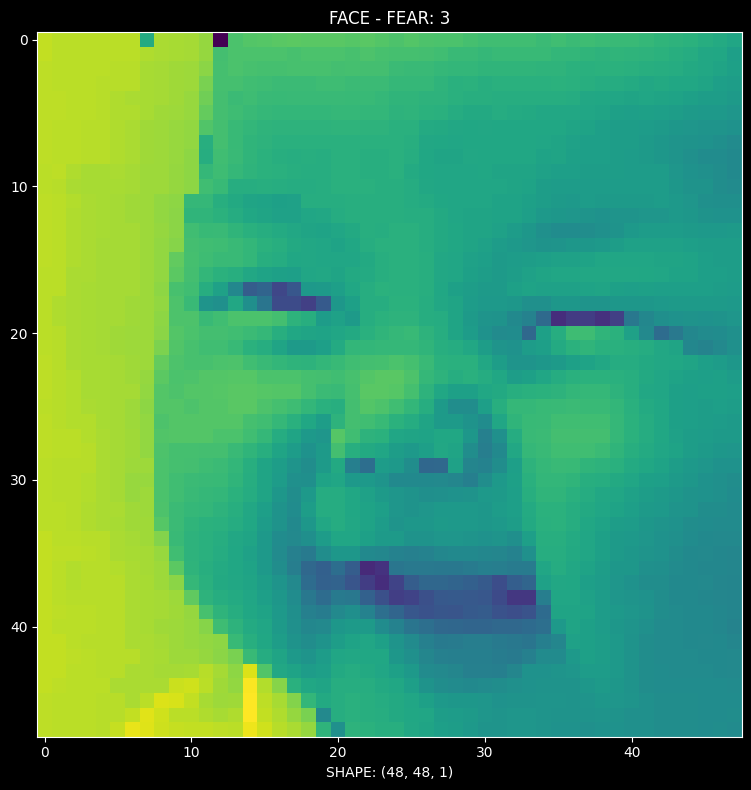

In [72]:
plt.figure(figsize=(15,8))
plt.xlabel(f"SHAPE: {test_input.shape}")
plt.title(f"FACE - FEAR: {target_result.index(max(target_result))}")
plt.imshow(test_input)
plt.tight_layout()
plt.show()

In [73]:
def displaying_all(source):
    figure = plt.figure(figsize=(10,10))
    Image_List = []
    plt.style.use("dark_background")
    for indexing in source:
        Read_IMG = plt.imshow(indexing, animated=True,cmap="hot")
        plt.axis('off')
        Image_List.append([Read_IMG])
    Animation_Func = animation.ArtistAnimation(figure,
                                               Image_List,
                                               interval=120,
                                               repeat_delay=9000)
    plt.close()
    return Animation_Func

In [74]:
HTML(displaying_all(pld).to_html5_video())

## the only thing left is the connection of HTML interfaces we created and the python code

In [80]:
from google.colab import files
uploaded = files.upload()


Saving Tabeer.html to Tabeer.html


In [76]:
!pip install flask

In [81]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def index():
    return render_template('Tabeer.html')

app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 714, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packag